<a href="https://colab.research.google.com/github/Ikromorozov/Tashkent_housing_price/blob/main/Copy_of_05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [5]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [ ]:
df.shape

(7565, 7)

In [8]:
# turn objects to int
df['size']=df['size'].astype(str).astype(float)

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [9]:
# find the non-integer value and drop that row
print(df[df['size']=='Площадьземли:1сот'])

                                      location     district  rooms  \
5347  город Ташкент, Яшнободский район, Дархон  Яшнободский      4   

                   size  level  max_levels   price  
5347  Площадьземли:1сот      3           5  150000  


In [10]:
df.drop(5347, inplace=True)

In [11]:
df['size']=df['size'].astype(str).astype(float)

In [12]:
df.describe()

,rooms,size,level,max_levels
count,7564.000000,7564.000000,7564.000000,7564.000000
mean,2.625463,113.268990,3.699365,6.038340
std,1.085157,1491.312092,2.237409,2.613417
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,66.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,70000.000000,19.000000,25.000000


In [13]:
df['price']=df['price'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: 'Договорная'

In [14]:
# find the non-integer value
print(df[df['price']=='Договорная'])

                                               location           district  \
202        город Ташкент, Яккасарайский район, Баходыра      Яккасарайский   
411        город Ташкент, Яккасарайский район, Баходыра      Яккасарайский   
439   город Ташкент, Мирзо-Улугбекский район, улица ...  Мирзо-Улугбекский   
460   город Ташкент, Чиланзарский район, Чиланзар 1-...       Чиланзарский   
507   город Ташкент, Яшнободский район, 1-й проезд А...        Яшнободский   
...                                                 ...                ...   
7039  город Ташкент, Яшнободский район, Городок Авиа...        Яшнободский   
7196     город Ташкент, Чиланзарский район, Чиланзар-16       Чиланзарский   
7323  город Ташкент, Мирзо-Улугбекский район, жилой ...  Мирзо-Улугбекский   
7403  город Ташкент, Учтепинский район, Чиланзар 14-...        Учтепинский   
7404  город Ташкент, Учтепинский район, Чиланзар 14-...        Учтепинский   

      rooms   size  level  max_levels       price  
202       3

In [18]:
#replace the non-numeric value to median
for i in df.index:
    if df.loc[i, 'price'] == 'Договорная':
        df.loc[i, 'price'] = median_price

In [19]:
df['price']=df['price'].astype(str).astype(float)

In [21]:
df.describe()

,rooms,size,level,max_levels,price
count,7564.000000,7564.000000,7564.000000,7564.000000,7.465000e+03
mean,2.625463,113.268990,3.699365,6.038340,7.132367e+04
std,1.085157,1491.312092,2.237409,2.613417,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


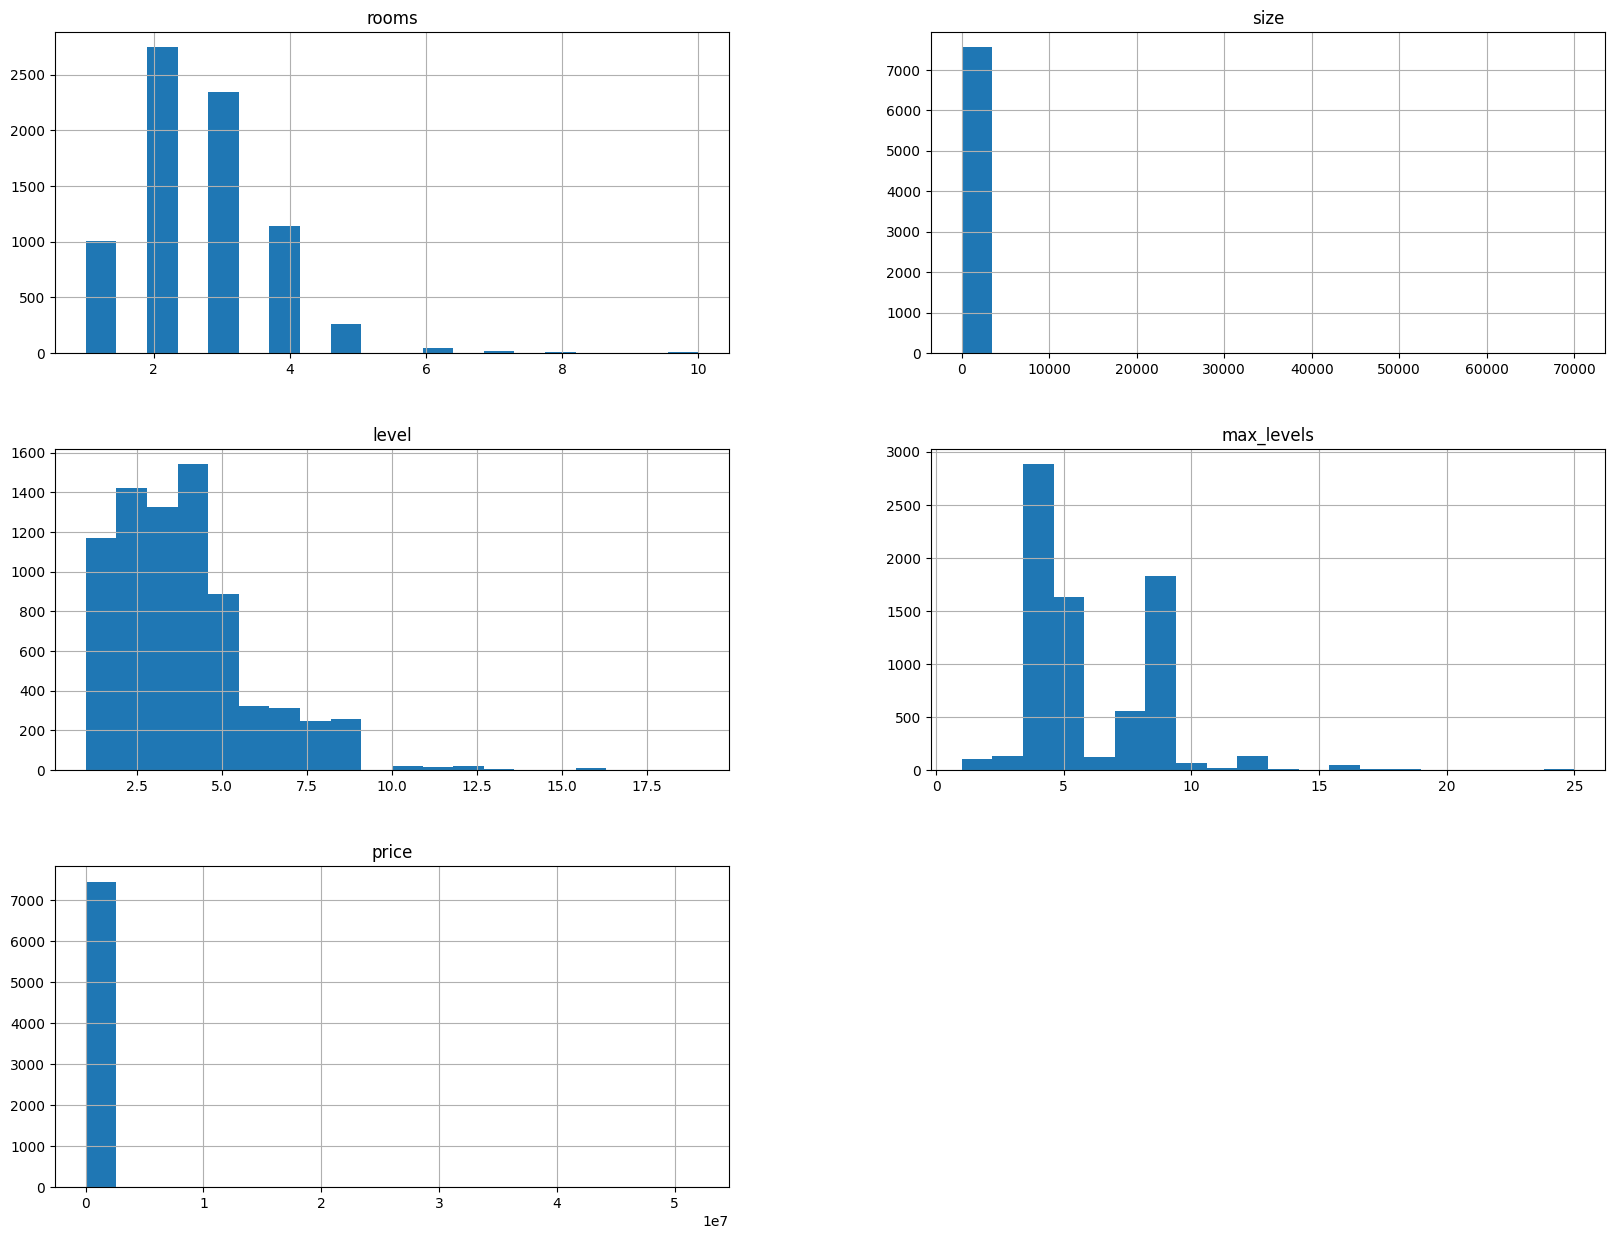

In [22]:
%matplotlib inline
df.hist(bins=20,figsize=(20,15))
plt.show()

In [23]:
df_num=df.drop(['location', 'district'], axis=1)

In [24]:
df_num.corrwith(df['price']).sort_values(ascending=False)

,0
price,1.000000
rooms,0.056161
max_levels,0.011175
size,0.001106
level,-0.003449


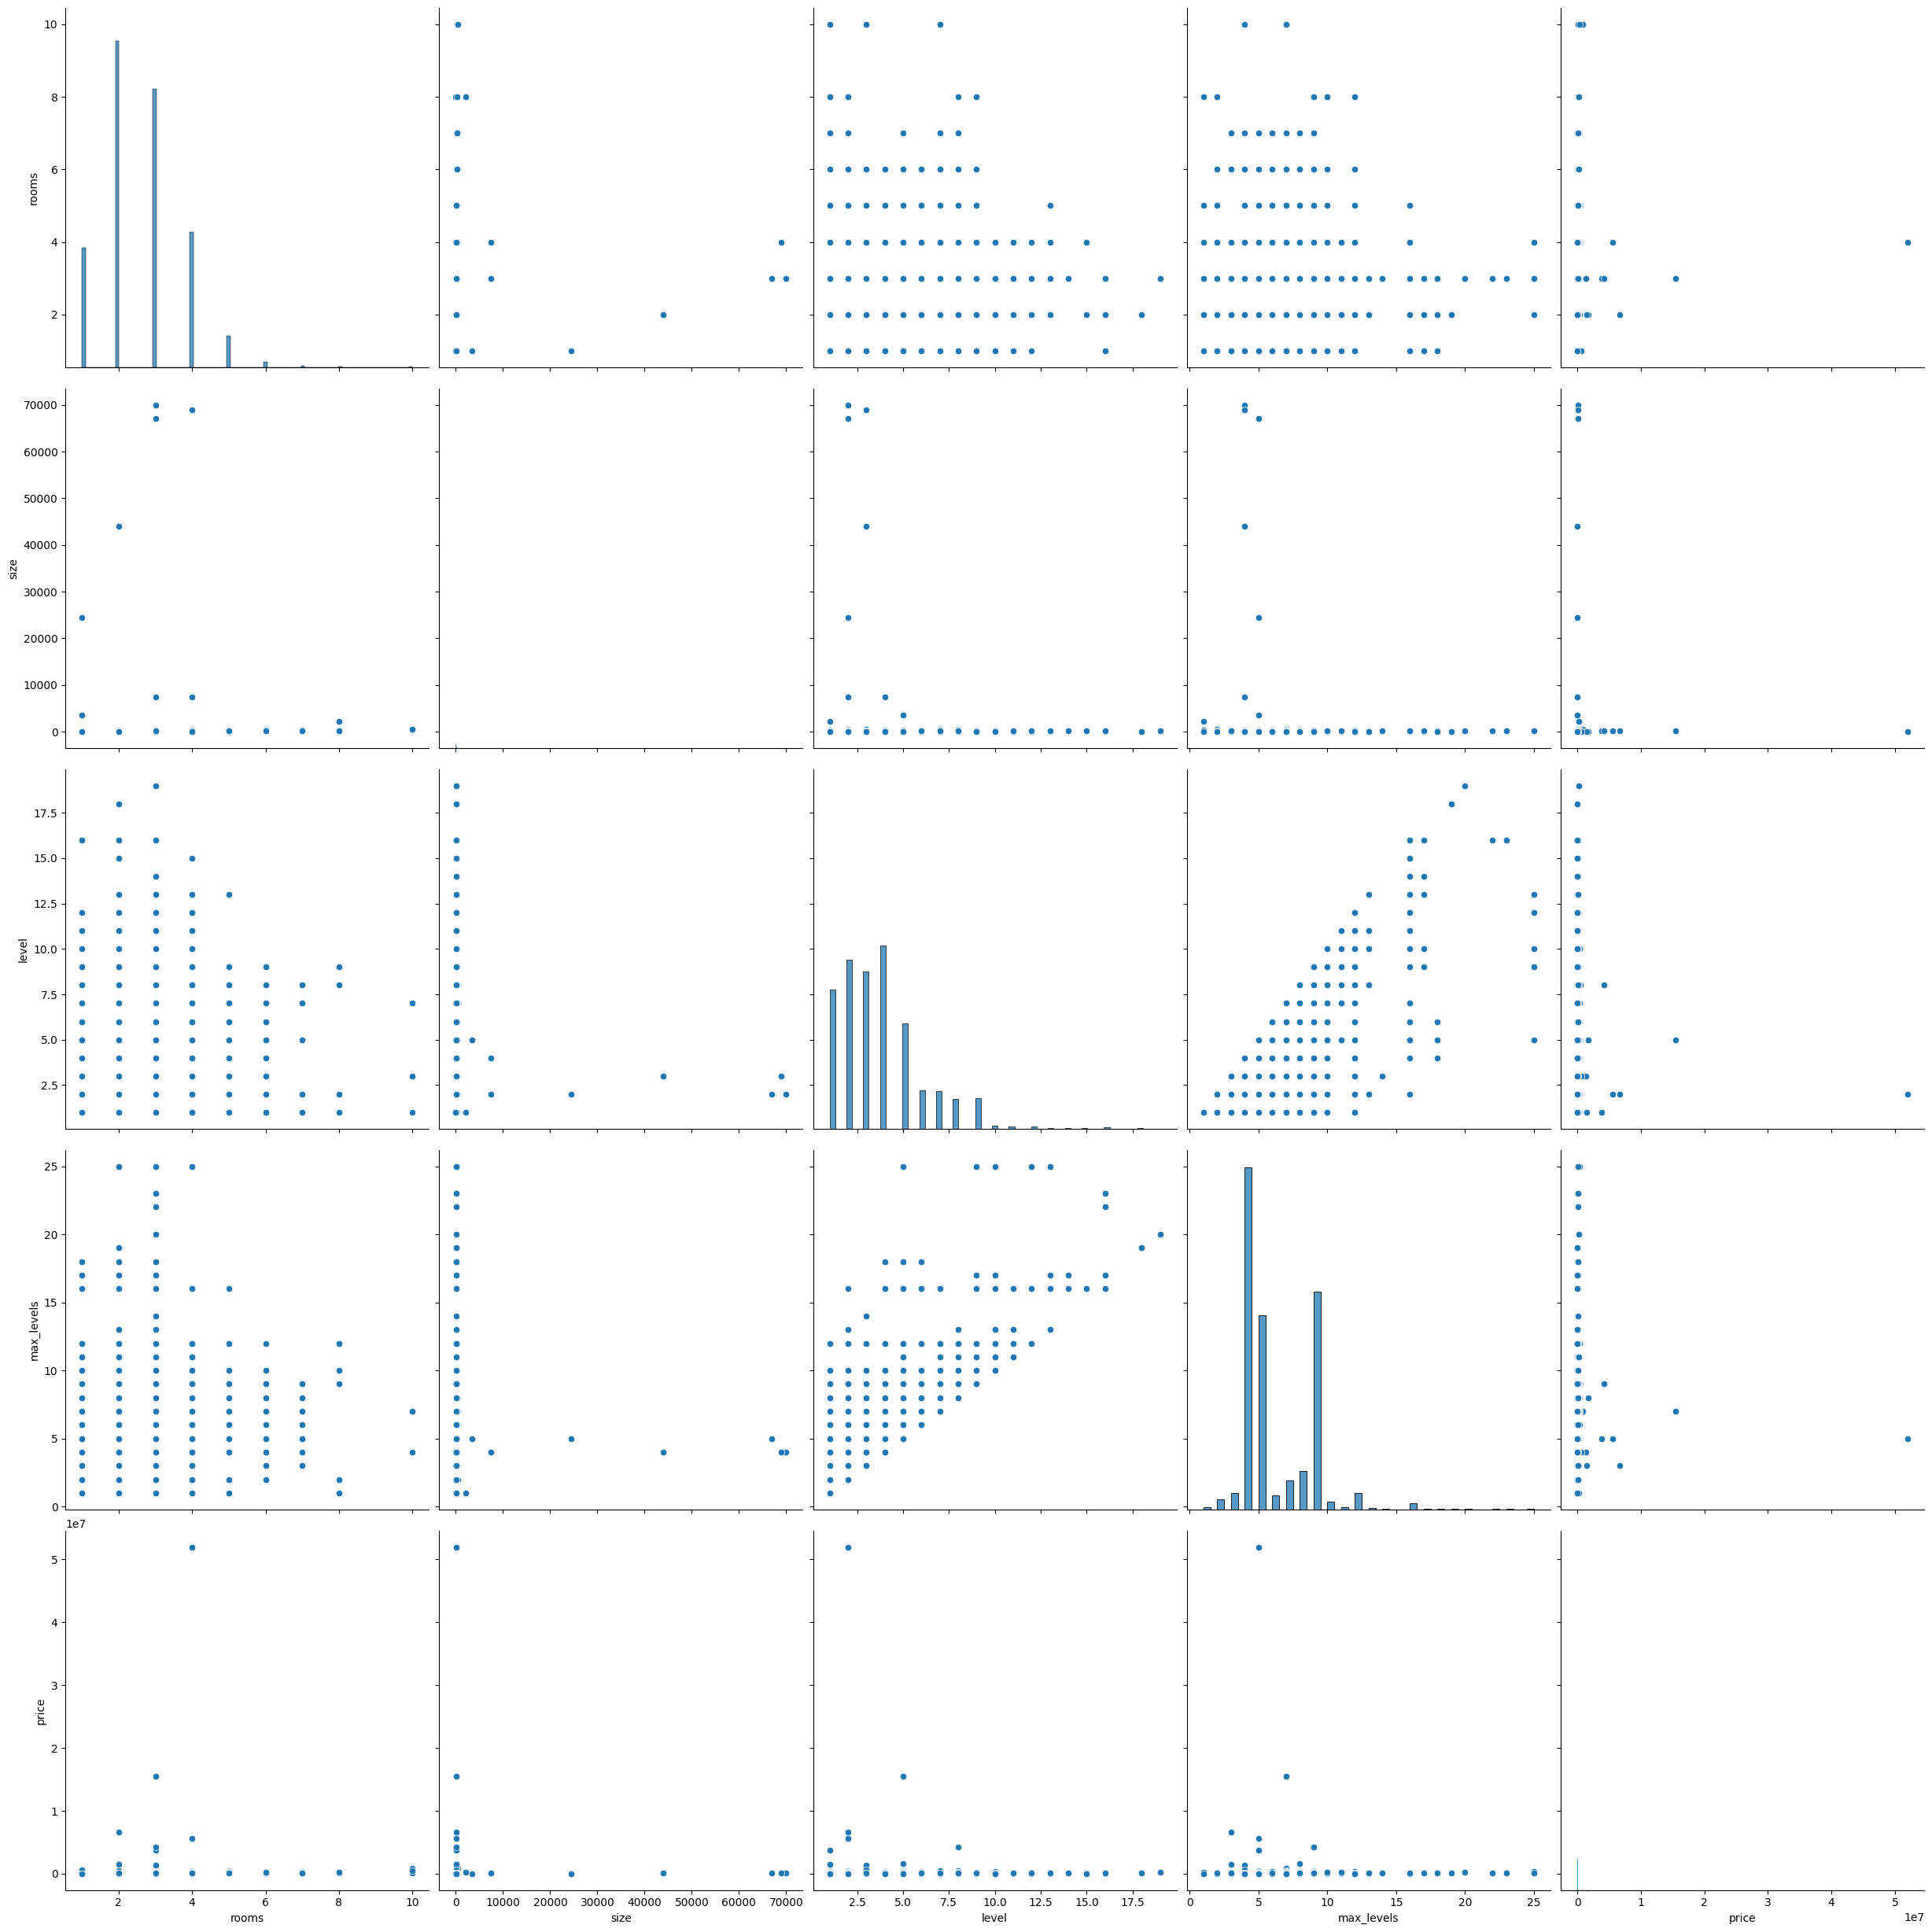

In [25]:
cols=['rooms', 'size', 'level', 'max_levels', 'price']
sns.pairplot(df_num[cols], height=5)
plt.show()

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
df_labels=train_set['price'].copy()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ['district']
full_pipeline = ColumnTransformer([
          ('num', num_pipeline, num_attribs),
          ('cat', OneHotEncoder(), cat_attribs)
])

In [29]:
df_prepared=full_pipeline.fit_transform(train_set)

In [35]:
# Assuming df_prepared is a NumPy array, check for NaN values
nan_values = np.isnan(df_prepared)

# If you need to know the indices of the NaN values:
nan_indices = np.where(nan_values)

print(f"Number of NaN values: {np.sum(nan_values)}")
print(f"Indices of NaN values: {nan_indices}")

Number of NaN values: 81
Indices of NaN values: (array([  93,  182,  340,  408,  578,  690,  845,  862,  921, 1011, 1107,
       1135, 1208, 1293, 1317, 1366, 1417, 1643, 1806, 1811, 1851, 1871,
       1921, 2039, 2055, 2087, 2136, 2209, 2236, 2420, 2506, 2530, 2574,
       2582, 2594, 2766, 2983, 3054, 3255, 3298, 3299, 3352, 3436, 3513,
       3730, 3751, 3887, 4084, 4098, 4250, 4316, 4335, 4355, 4564, 4584,
       4609, 4616, 4655, 4672, 4673, 4703, 4807, 4823, 4845, 4858, 4978,
       5023, 5035, 5151, 5209, 5225, 5315, 5550, 5645, 5672, 5728, 5775,
       5776, 5805, 5853, 5898]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [62]:
df_prepared = np.nan_to_num(df_prepared)
df_labels = np.nan_to_num(df_labels)

In [63]:
df_prepared.shape

(6051, 17)

In [64]:
df_prepared[0:5,:]

array([[ 0.34373921, -0.02477922, -0.75757084,  1.12775328, -0.02752218,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.26367109, -0.01181469,  1.02576359,  1.12775328, -0.05933158,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.57619266, -0.04308208,  0.13409638, -0.78416959, -0.1594506 ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.34373921, -0.02477922,  1.91743081,  1.12775328, -0.07205534,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [65]:
df_labels.shape

(6051,)

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [112]:
test_set

,location,district,rooms,size,level,max_levels,price
1718,"город Ташкент, Яккасарайский район, 7-й проезд...",Яккасарайский,2,82.0,8,8,69900.0
4715,"город Ташкент, Юнусабадский район, 2-й проезд ...",Юнусабадский,3,100.0,1,4,68000.0
5022,"город Ташкент, Яшнободский район, жилой компле...",Яшнободский,4,120.0,2,4,110000.0
1046,"город Ташкент, Мирабадский район, Нукус",Мирабадский,2,65.0,5,9,70000.0
2707,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,75.0,9,9,55000.0
...,...,...,...,...,...,...,...
333,"город Ташкент, Чиланзарский район, Чиланзар 7-...",Чиланзарский,2,58.0,1,9,40000.0
5037,"город Ташкент, Учтепинский район, Кухна-Чупоно...",Учтепинский,2,44.0,4,5,36000.0
3047,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,3,78.0,3,4,120000.0
4679,"город Ташкент, Шайхантахурский район, 1-я Ипакчи",Шайхантахурский,2,65.0,3,4,36000.0


In [113]:
test_labels=test_set['price'].copy()

In [114]:
test_data=train_set.sample(5)
test_data

,location,district,rooms,size,level,max_levels,price
3170,"город Ташкент, Яккасарайский район, Мирабад",Яккасарайский,3,75.0,7,9,63000.0
2908,"город Ташкент, Юнусабадский район, Кашгар",Юнусабадский,1,38.0,3,4,48499.0
5550,"город Ташкент, Шайхантахурский район, 1- проез...",Шайхантахурский,2,60.0,3,9,46000.0
3880,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,30.0,7,9,21500.0
6958,"город Ташкент, Мирзо-Улугбекский район, Ахмада...",Мирзо-Улугбекский,4,95.0,5,5,46000.0


In [115]:
test_labels

,price
1718,69900.0
4715,68000.0
5022,110000.0
1046,70000.0
2707,55000.0
...,...
333,40000.0
5037,36000.0
3047,120000.0
4679,36000.0


In [116]:
test_label = df.loc[test_data.index, 'price']
test_label

,price
3170,63000.0
2908,48499.0
5550,46000.0
3880,21500.0
6958,46000.0


In [117]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 0.34373921, -0.02249136,  1.4715972 ,  1.12775328, -0.00843654,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-1.49612454, -0.05070828, -0.31173723, -0.78416959, -0.06993895,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.57619266, -0.03393065, -0.31173723,  1.12775328, -0.08053784,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.57619266, -0.05680923,  1.4715972 ,  1.12775328, -0.18444854,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [118]:
predicted_data = lin_reg.predict(test_data_prepared)
predicted_data

array([62281.23701166, 48599.5951333 , 42437.16721961, 19127.7091854 ,
       45142.40597583])

In [119]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
3170,62281.237012,63000.0
2908,48599.595133,48499.0
5550,42437.167220,46000.0
3880,19127.709185,21500.0
6958,45142.405976,46000.0


In [120]:
x_test=test_set
x_test

,location,district,rooms,size,level,max_levels,price
1718,"город Ташкент, Яккасарайский район, 7-й проезд...",Яккасарайский,2,82.0,8,8,69900.0
4715,"город Ташкент, Юнусабадский район, 2-й проезд ...",Юнусабадский,3,100.0,1,4,68000.0
5022,"город Ташкент, Яшнободский район, жилой компле...",Яшнободский,4,120.0,2,4,110000.0
1046,"город Ташкент, Мирабадский район, Нукус",Мирабадский,2,65.0,5,9,70000.0
2707,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,75.0,9,9,55000.0
...,...,...,...,...,...,...,...
333,"город Ташкент, Чиланзарский район, Чиланзар 7-...",Чиланзарский,2,58.0,1,9,40000.0
5037,"город Ташкент, Учтепинский район, Кухна-Чупоно...",Учтепинский,2,44.0,4,5,36000.0
3047,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,3,78.0,3,4,120000.0
4679,"город Ташкент, Шайхантахурский район, 1-я Ипакчи",Шайхантахурский,2,65.0,3,4,36000.0


In [121]:
y_test = test_set['price'].copy()
y_test

,price
1718,69900.0
4715,68000.0
5022,110000.0
1046,70000.0
2707,55000.0
...,...
333,40000.0
5037,36000.0
3047,120000.0
4679,36000.0


In [122]:
X_test_prepared = full_pipeline.transform(x_test)

In [123]:
X_test_prepared

array([[-0.57619266, -0.01715303,  1.91743081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.34373921, -0.00342588, -1.20340445, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26367109,  0.01182651, -0.75757084, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.34373921, -0.0202035 , -0.31173723, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57619266, -0.03011755, -0.31173723, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57619266, -0.04155684, -1.20340445, ...,  0.        ,
         0.        ,  0.        ]])

In [124]:
X_test_prepared = np.nan_to_num(X_test_prepared)

In [125]:
x_test_predicted=lin_reg.predict(X_test_prepared)

In [126]:
pd.DataFrame({'Prognoz':x_test_predicted, 'Real baxosi': y_test})

,Prognoz,Real baxosi
1718,69443.663436,69900.0
4715,67670.060700,68000.0
5022,107341.579825,110000.0
1046,70024.977459,70000.0
2707,54406.512257,55000.0
...,...,...
333,39355.208844,40000.0
5037,35701.586479,36000.0
3047,119327.085914,120000.0
4679,32657.242536,36000.0


In [127]:
X_test_prepared = np.nan_to_num(X_test_prepared)
y_test_prepared = np.nan_to_num(y_test)  # Apply to y_test as well to handle potential NaN in labels

Training_data_accuracy = lin_reg.score(X_test_prepared, y_test_prepared)
Training_data_accuracy

0.9999729996332327